In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [20]:
import os
os.chdir('/content/drive/My Drive/ChefGPT')

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.models import Model

# Load data
user_interaction_df = pd.read_csv('user_interaction.csv')

# Encode categorical variables
label_encoders = {}
for col in ['user_id', 'food_id']:
    le = LabelEncoder()
    user_interaction_df[col] = le.fit_transform(user_interaction_df[col])
    label_encoders[col] = le

# Train-test split
X = user_interaction_df[['user_id', 'food_id']]
y = user_interaction_df['liked']  # Assuming 'liked' is the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model parameters
num_users = user_interaction_df['user_id'].nunique()
num_foods = user_interaction_df['food_id'].nunique()
embed_size = 50

# Define model architecture
user_input = tf.keras.Input(shape=(1,), name='user_input')
food_input = tf.keras.Input(shape=(1,), name='food_input')

user_embedding = Embedding(input_dim=num_users, output_dim=embed_size)(user_input)
food_embedding = Embedding(input_dim=num_foods, output_dim=embed_size)(food_input)

user_flatten = Flatten()(user_embedding)
food_flatten = Flatten()(food_embedding)

concat = Concatenate()([user_flatten, food_flatten])

fc1 = Dense(128, activation='relu')(concat)
fc2 = Dense(64, activation='relu')(fc1)
output = Dense(1, activation='sigmoid')(fc2)

# Define model
model = Model(inputs=[user_input, food_input], outputs=output)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
model.fit([X_train['user_id'], X_train['food_id']], y_train, epochs=10, batch_size=64, validation_data=([X_test['user_id'], X_test['food_id']], y_test))



Epoch 1/10
11043/11043 [==============================] - 57s 5ms/step - loss: 0.6401 - accuracy: 0.6623 - val_loss: 0.6402 - val_accuracy: 0.6616
Epoch 2/10
11043/11043 [==============================] - 58s 5ms/step - loss: 0.6396 - accuracy: 0.6623 - val_loss: 0.6401 - val_accuracy: 0.6616
Epoch 3/10
11043/11043 [==============================] - 57s 5ms/step - loss: 0.6380 - accuracy: 0.6623 - val_loss: 0.6413 - val_accuracy: 0.6616
Epoch 4/10
11043/11043 [==============================] - 57s 5ms/step - loss: 0.6330 - accuracy: 0.6623 - val_loss: 0.6444 - val_accuracy: 0.6616
Epoch 5/10
11043/11043 [==============================] - 54s 5ms/step - loss: 0.6265 - accuracy: 0.6628 - val_loss: 0.6517 - val_accuracy: 0.6607
Epoch 6/10
11043/11043 [==============================] - 52s 5ms/step - loss: 0.6195 - accuracy: 0.6648 - val_loss: 0.6583 - val_accuracy: 0.6518
Epoch 7/10
11043/11043 [==============================] - 57s 5ms/step - loss: 0.6131 - accuracy: 0.6685 - val_loss: 0

In [ ]:
user_interaction_df

,user_id,food_id,swiped,liked
0,162,831,1,1
1,355,3309,1,1
2,340,2753,1,1
3,389,3430,1,1
4,382,2381,1,1
...,...,...,...,...
883377,103,4,1,1
883378,375,1858,1,1
883379,149,2505,1,1
883380,326,2272,1,1


Epoch 1/10
11043/11043 [==============================] - 55s 5ms/step - loss: 0.6400 - accuracy: 0.6622 - val_loss: 0.6401 - val_accuracy: 0.6616
Epoch 2/10
11043/11043 [==============================] - 63s 6ms/step - loss: 0.6396 - accuracy: 0.6623 - val_loss: 0.6405 - val_accuracy: 0.6616
Epoch 3/10
11043/11043 [==============================] - 56s 5ms/step - loss: 0.6379 - accuracy: 0.6623 - val_loss: 0.6415 - val_accuracy: 0.6616
Epoch 4/10
11043/11043 [==============================] - 55s 5ms/step - loss: 0.6333 - accuracy: 0.6623 - val_loss: 0.6454 - val_accuracy: 0.6615
Epoch 5/10
11043/11043 [==============================] - 53s 5ms/step - loss: 0.6272 - accuracy: 0.6627 - val_loss: 0.6499 - val_accuracy: 0.6597
Epoch 6/10
11043/11043 [==============================] - 57s 5ms/step - loss: 0.6207 - accuracy: 0.6650 - val_loss: 0.6552 - val_accuracy: 0.6584
Epoch 7/10
11043/11043 [==============================] - 56s 5ms/step - loss: 0.6141 - accuracy: 0.6688 - val_loss: 0

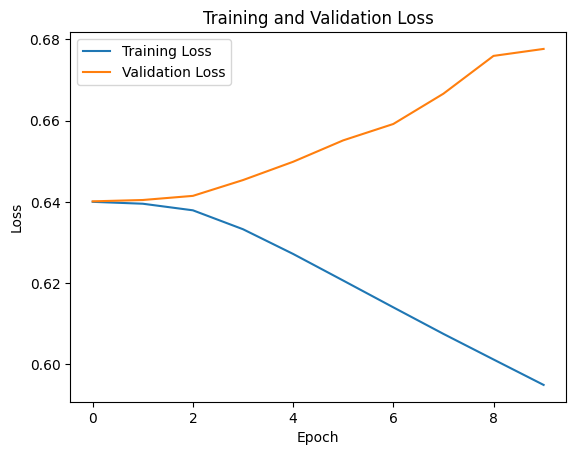

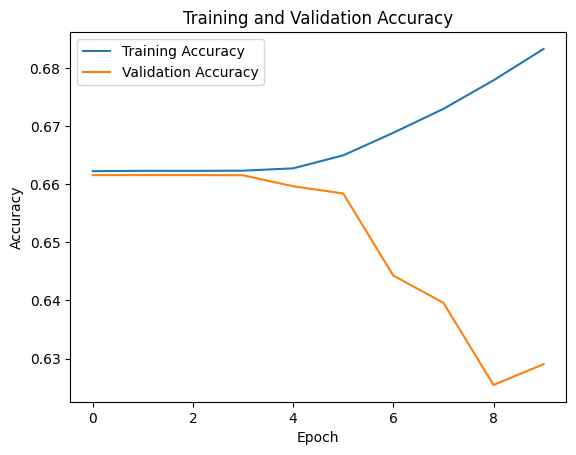

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Embedding, Flatten, Concatenate, Dense
from tensorflow.keras.models import Model

# Load data
user_interaction_df = pd.read_csv('user_interaction.csv')

# Encode categorical variables
label_encoders = {}
for col in ['user_id', 'food_id']:
    le = LabelEncoder()
    user_interaction_df[col] = le.fit_transform(user_interaction_df[col])
    label_encoders[col] = le

# Train-test split
X = user_interaction_df[['user_id', 'food_id']]
y = user_interaction_df['liked']  # Assuming 'liked' is the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define model parameters
num_users = user_interaction_df['user_id'].nunique()
num_foods = user_interaction_df['food_id'].nunique()
embed_size = 50

# Define model architecture
user_input = tf.keras.Input(shape=(1,), name='user_input')
food_input = tf.keras.Input(shape=(1,), name='food_input')

user_embedding = Embedding(input_dim=num_users, output_dim=embed_size)(user_input)
food_embedding = Embedding(input_dim=num_foods, output_dim=embed_size)(food_input)

user_flatten = Flatten()(user_embedding)
food_flatten = Flatten()(food_embedding)

concat = Concatenate()([user_flatten, food_flatten])

fc1 = Dense(128, activation='relu')(concat)
fc2 = Dense(64, activation='relu')(fc1)
output = Dense(1, activation='sigmoid')(fc2)

# Define model
model = Model(inputs=[user_input, food_input], outputs=output)

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit([X_train['user_id'], X_train['food_id']], y_train, epochs=10, batch_size=64, validation_data=([X_test['user_id'], X_test['food_id']], y_test))

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predictions on training data
train_predictions = model.predict([X_train['user_id'], X_train['food_id']])

# Predictions on testing data
test_predictions = model.predict([X_test['user_id'], X_test['food_id']])

# Calculate RMSE and MAE for training data
train_rmse = mean_squared_error(y_train, train_predictions, squared=False)
train_mae = mean_absolute_error(y_train, train_predictions)

# Calculate RMSE and MAE for testing data
test_rmse = mean_squared_error(y_test, test_predictions, squared=False)
test_mae = mean_absolute_error(y_test, test_predictions)

print("Training RMSE:", train_rmse)
print("Training MAE:", train_mae)
print("Testing RMSE:", test_rmse)
print("Testing MAE:", test_mae)


5522/5522 [==============================] - 7s 1ms/step
Training RMSE: 0.44317878743244354
Training MAE: 0.4045964621365947
Testing RMSE: 0.48878085117974535
Testing MAE: 0.44760078888087096


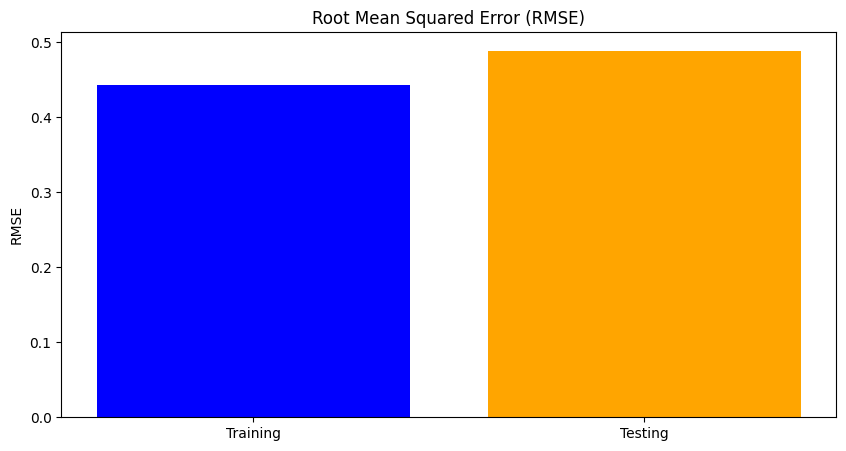

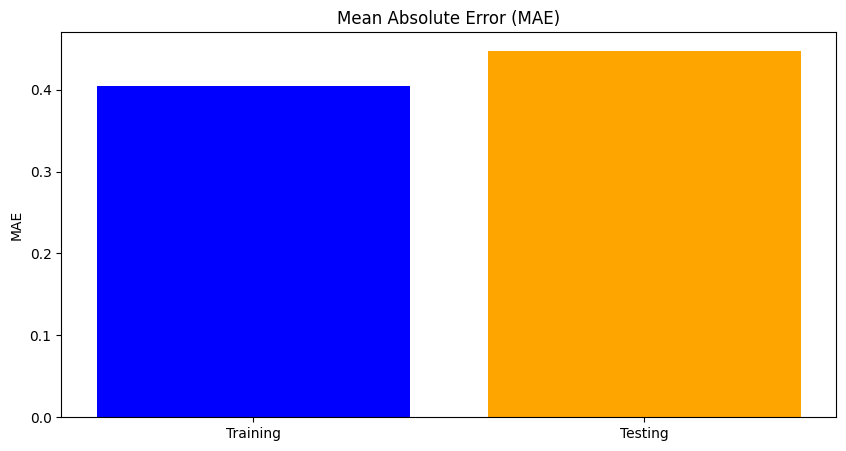

In [33]:
import matplotlib.pyplot as plt

# Create lists to store RMSE and MAE values
rmse_values = [train_rmse, test_rmse]
mae_values = [train_mae, test_mae]
labels = ['Training', 'Testing']

# Plot RMSE
plt.figure(figsize=(10, 5))
plt.bar(labels, rmse_values, color=['blue', 'orange'])
plt.title('Root Mean Squared Error (RMSE)')
plt.ylabel('RMSE')
plt.show()

# Plot MAE
plt.figure(figsize=(10, 5))
plt.bar(labels, mae_values, color=['blue', 'orange'])
plt.title('Mean Absolute Error (MAE)')
plt.ylabel('MAE')
plt.show()


In [34]:
# Define the path to save the model on your Google Drive
model_save_path = '/content/drive/My Drive/ChefGPT/ann_final.h5'

# Save the model
model.save(model_save_path)

print("Model saved successfully to:", model_save_path)


Model saved successfully to: /content/drive/My Drive/ChefGPT/ann_final.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [35]:
# Save DataFrame to a CSV file
user_interaction_df.to_csv('/content/drive/My Drive/ChefGPT/user_interaction_after.csv', index=False)


In [19]:
label_encoders

{'user_id': LabelEncoder(), 'food_id': LabelEncoder()}

In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pickle

# Load data
user_interaction_df = pd.read_csv('user_interaction.csv')

# Initialize label encoders
label_encoders = {}

# Encode categorical variables
for col in ['user_id', 'food_id']:
    le = LabelEncoder()
    user_interaction_df[col] = le.fit_transform(user_interaction_df[col])
    label_encoders[col] = le

# Save label encoders to a pickle file
label_encoders_path = '/content/drive/My Drive/ChefGPT/label_encoders.pkl'
with open(label_encoders_path, 'wb') as f:
    pickle.dump(label_encoders, f)


In [28]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the label encoders
label_encoders = {}
label_encoders_path = '/content/drive/My Drive/ChefGPT/label_encoders.pkl'  # Path to saved label encoders
with open(label_encoders_path, 'rb') as f:
    label_encoders = pickle.load(f)

# Define the path from which to load the model
model_load_path = '/content/drive/My Drive/ChefGPT/ann_final.h5'

# Load the model
loaded_model = tf.keras.models.load_model(model_load_path)

# Now you can use the loaded model to make predictions or perform other tasks
# For example, you can make predictions for a given user ID and food ID
user_id = 'DVpXgzUVaoMNJdbNm55v5FytY5o2'
food_id = '-NxD9n6vxWqfYwbAaaIA'

# Encode user_id and food_id
user_id_encoded = label_encoders['user_id'].transform([user_id])
food_id_encoded = label_encoders['food_id'].transform([food_id])
print(user_id_encoded, food_id_encoded)

# Make prediction using the loaded model
prediction = loaded_model.predict([user_id_encoded, food_id_encoded])

print("Prediction for user", user_id, "and food", food_id, ":", prediction)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/ChefGPT/label_encoders.pkl'

In [36]:
import tensorflow as tf

# Define the path from which to load the model
model_load_path = '/content/drive/My Drive/ChefGPT/ann_final.h5'

# Load the model
loaded_model = tf.keras.models.load_model(model_load_path)

import numpy as np

# Define a function to get predictions for all foods for a given user
def predict_all_foods_for_user(user_id, model, label_encoders):
    # Get the encoded user ID
    user_id_encoded = label_encoders['user_id'].transform([user_id])

    # Get all encoded food IDs
    num_foods = len(label_encoders['food_id'].classes_)
    all_food_ids = np.arange(num_foods).reshape(-1, 1)

    # Repeat the user ID for all food IDs
    user_ids = np.repeat(user_id_encoded, num_foods)

    # Make predictions using the loaded model
    predictions = model.predict([user_ids, all_food_ids])

    return predictions

# Use the function to get predictions for all foods for the given user
user_id = 'NW3XElv8abQiwzPTN3F94w6n2WZ2'
predictions = predict_all_foods_for_user(user_id, loaded_model, label_encoders)

# Sort the predictions in descending order
sorted_indices = np.argsort(predictions[:, 0])[::-1]

# Print all recommendations in decreasing order of probability
print("All recommendations in decreasing order of probability for user", user_id)
for idx in sorted_indices:
    food_id = label_encoders['food_id'].classes_[idx]
    probability = predictions[idx][0]
    print("Food:", food_id, "- Probability:", probability)


90/90 [==============================] - 0s 2ms/step
All recommendations in decreasing order of probability for user NW3XElv8abQiwzPTN3F94w6n2WZ2
Food: -NxDC-S-ivh2XH9NsJnC - Probability: 0.9259633
Food: -NxD8C9lJeI7DTklcrAb - Probability: 0.9156701
Food: -NxDAnHzozy_SZC2Cwho - Probability: 0.9122296
Food: -NxDDROG5D4yoQDeYbBR - Probability: 0.9090275
Food: -NxDJqwjC9wuGLrz9S14 - Probability: 0.9088152
Food: -NxDD7C2LqvKMo9bMNom - Probability: 0.90849954
Food: -NxDH8lonFy0VkXsd6_3 - Probability: 0.903274
Food: -NxDEKKpoTAtTNxErrEB - Probability: 0.90103686
Food: -NxDBDYjrUQzVLLf07Qs - Probability: 0.8997295
Food: -NxDEiphcjyfOvVkzzT4 - Probability: 0.8996416
Food: -NxDEMdlS-GP7aDiriES - Probability: 0.8980386
Food: -NxDMY9qSsoOtUC7pbbF - Probability: 0.896306
Food: -NxDFM2UmRryDfEPQ_P8 - Probability: 0.89451474
Food: -NxDF8fbVCTvv7WVWsew - Probability: 0.89427465
Food: -NxDKykFgw1bQLORF2oo - Probability: 0.89089876
Food: -NxDIUlr_-I8U6Moc5SO - Probability: 0.890668
Food: -NxDB8_0iD9gU9

In [37]:
import numpy as np
import pandas as pd

# Define a function to get predictions for all foods for a given user
def predict_all_foods_for_user(user_id, model, label_encoders):
    # Get the encoded user ID
    user_id_encoded = label_encoders['user_id'].transform([user_id])

    # Get all encoded food IDs
    num_foods = len(label_encoders['food_id'].classes_)
    all_food_ids = np.arange(num_foods).reshape(-1, 1)

    # Repeat the user ID for all food IDs
    user_ids = np.repeat(user_id_encoded, num_foods)

    # Make predictions using the loaded model
    predictions = model.predict([user_ids, all_food_ids])

    return predictions

# Create an empty DataFrame to store recommendations
recommendations_df = pd.DataFrame(columns=['user_id', 'food_id', 'probability'])

# Loop through all users
for user_id in label_encoders['user_id'].classes_:
    # Use the function to get predictions for all foods for the given user
    predictions = predict_all_foods_for_user(user_id, loaded_model, label_encoders)

    # Sort the predictions in descending order
    sorted_indices = np.argsort(predictions[:, 0])[::-1]

    # Store the top recommendations for this user
    for idx in sorted_indices:
        food_id = label_encoders['food_id'].classes_[idx]
        probability = predictions[idx][0]
        recommendations_df = pd.concat([recommendations_df, pd.DataFrame({'user_id': [user_id], 'food_id': [food_id], 'probability': [probability]})], ignore_index=True)

# Save the recommendations to a CSV file
recommendations_df.to_csv('ann_recom_prob.csv', index=False)


90/90 [==============================] - 0s 2ms/step


KeyboardInterrupt: 

In [13]:
user_interaction_df = pd.read_csv('user_interaction_after.csv')
user_interaction_df

,user_id,food_id,swiped,liked
0,371,58,1,1
1,301,58,1,1
2,242,58,1,1
3,8,58,1,1
4,262,58,1,1
...,...,...,...,...
883377,191,973,1,1
883378,139,973,1,1
883379,153,973,1,1
883380,84,973,1,1
